In [4]:
# Importing and loading
import pandas as pd
import numpy as np

from pandas import Series, DataFrame

from sklearn.cross_validation import train_test_split
from sklearn import preprocessing

# Estimator 
from sklearn.svm import SVC

# Evaluation
from sklearn import metrics
from sklearn.cross_validation import cross_val_score, KFold, StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score

# Optimization
from sklearn.grid_search import GridSearchCV

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)

%matplotlib inline
%run plot_learning_curve



In [5]:
#We get a URL with raw content (not HTML one)

df = pd.read_csv(url)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
#Filling missing values
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Sex'].fillna('male', inplace=True)
df['Embarked'].fillna('S', inplace=True)

# Once filled, encode categorical variables
df['Age']=df['Age'].fillna(df['Age'].median())
df.loc[df['Sex']=='male', 'Sex']=0
df.loc[df['Sex']=='female', 'Sex']=1
df.loc[df['Embarked']=='S', 'Embarked']=0
df.loc[df['Embarked']=='C', 'Embarked']=1
df.loc[df['Embarked']=='Q', 'Embarked']=2

# Drop some columns
df.drop(['Cabin', 'Ticket', 'Name'], axis=1, inplace=True)

df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,0
1,2,1,1,1,38.0,1,0,71.2833,1
2,3,1,3,1,26.0,0,0,7.9250,0
3,4,1,1,1,35.0,1,0,53.1000,0
4,5,0,3,0,35.0,0,0,8.0500,0


In [7]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked         int64
dtype: object

In [8]:
df.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Sex            False
Age            False
SibSp          False
Parch          False
Fare           False
Embarked       False
dtype: bool

In [9]:
#Now df looks how we want it. Let's split it up
#Features
features=['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
# Transfrom dataframe in numpy Arrays
X=df[features].values
y=df['Survived'].values

#Split up
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.25, random_state=33)


In [10]:
# Define model
types_of_kernels = ['linear', 'rbf', 'poly']

kernel = types_of_kernels[0]
gamma=3.0

# kNN model
model = SVC(kernel = kernel, probability=True, gamma=gamma)

In [11]:
# Train and evaluate
model.fit(X_train, y_train)

predicted=model.predict(X_test)
expected=y_test

In [12]:
#Accuracy
metrics.accuracy_score(expected, predicted)

0.8116591928251121

In [13]:
# Null accuracy: Accuracy that could be achieved by always predicting the most frequent class
# Remember. Results are Survived or not Survived
s_y_test=Series(y_test)
s_y_test.value_counts()

0    134
1     89
dtype: int64

In [14]:
# Mean of ones
y_test.mean()

0.3991031390134529

In [15]:
#Mean of zeros
1-y_test.mean()

0.600896860986547

In [16]:
#Null accuracy
max(y_test.mean(), 1-y_test.mean())

0.600896860986547

In [17]:
# Confussion Matrix
metrics.confusion_matrix(expected, predicted)

array([[115,  19],
       [ 23,  66]])

In [18]:
print(classification_report(expected,predicted))

             precision    recall  f1-score   support

          0       0.83      0.86      0.85       134
          1       0.78      0.74      0.76        89

avg / total       0.81      0.81      0.81       223



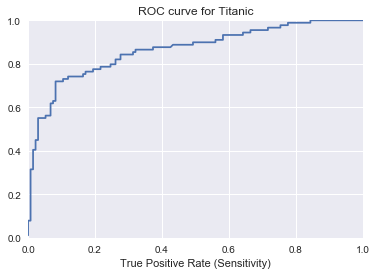

In [19]:
#ROC curve illustrates performace of a binary classifier
# as its discrimination threshold changes
y_pred_prob=model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Titanic')
plt.xlabel('False Positive Rate (1 - Recall)')
plt.xlabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [20]:
thresholds

array([0.75296094, 0.74852506, 0.74838279, 0.74340894, 0.74331339,
       0.74274909, 0.74268053, 0.74266171, 0.74260166, 0.74240277,
       0.74230291, 0.74205669, 0.74189173, 0.74169286, 0.74152687,
       0.74141778, 0.74136365, 0.74100951, 0.74095501, 0.7408182 ,
       0.74072601, 0.73933925, 0.73723066, 0.7369102 , 0.73661394,
       0.73600951, 0.1971425 , 0.19655461, 0.19586556, 0.19563439,
       0.19328623, 0.19324169, 0.19316884, 0.19313893, 0.19221014,
       0.19211288, 0.19202618, 0.19198771, 0.1919435 , 0.1919011 ,
       0.19181595, 0.19181354, 0.1918096 , 0.19180523, 0.19173593,
       0.19171755, 0.19160933, 0.19160187, 0.19146355, 0.19145138,
       0.19143298, 0.19143282, 0.19132727, 0.19131123, 0.19129828,
       0.1911751 , 0.19114806, 0.191142  , 0.19112981, 0.19111692,
       0.1910995 , 0.19105954, 0.19104481, 0.19100366, 0.19088737,
       0.19086401, 0.1905273 , 0.19050082, 0.19042718, 0.19037997,
       0.18982072, 0.18980886, 0.18521669, 0.18122866])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1095b8978>,
      dtype=object)

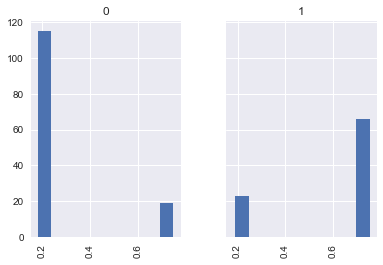

In [21]:
# After finding the classifier to quantify model's 
# performance (kNN model) we continue analyzing how good
# is it. Histogram of probability vs actual
dprob = pd.DataFrame(data = {'probability':y_pred_prob, 'actual':y_test})
dprob.probability.hist(by=dprob.actual, sharex=True, sharey=True)



In [22]:
# Lets set a threshold using ROC curve
def evaluate_threshold(threshold):
    print('Sensitivity:', tpr[thresholds>threshold][-1])
    print('Recall',1-fpr[thresholds>threshold][-1])

In [24]:
evaluate_threshold(0.5)

Sensitivity: 0.7415730337078652
Recall 0.8805970149253731


In [25]:
# We will use the threshold given by AUC of ROC
print(roc_auc_score(expected, predicted))


0.799890994465873


In [26]:
# An alternative way is to evaluate with K-Fold
# Cross-validation
cv = KFold(X.shape[0], n_folds=5, shuffle=False, random_state=33)
scores = cross_val_score(model, X, y, cv=cv)
print('Scores in every iteration', scores)
print('Accuracy: %0.2f (+/- %0.2f)'% (scores.mean(), scores.std()*2))

Scores in every iteration [0.81564246 0.80337079 0.78089888 0.73595506 0.80337079]
Accuracy: 0.79 (+/- 0.06)


KeyboardInterrupt: 

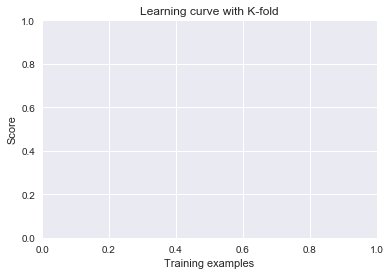

In [27]:
plot_learning_curve(model, 'Learning curve with K-fold', X, y, cv=cv)

In [30]:
# For optimization
gammas=np.logspace(-6, -1, 10)
gs=GridSearchCV(model, param_grid=dict(gamma=gammas))
gs.fit(X_train, y_test)
scores=gs.scores(X_test, y_test)
print(scores)

ValueError: Found input variables with inconsistent numbers of samples: [668, 223]